In [2]:
import torch
from scipy.spatial.distance import cosine
from transformers import AutoModel, AutoTokenizer

In [3]:
tokenizer = AutoTokenizer.from_pretrained("johngiorgi/declutr-sci-base")

In [4]:
import pandas as pd
df = pd.read_csv("Outputs/umap_embeddings_labels_1.tsv", sep='\t', index_col=None, header=0)
df.head()

,Symbol,Type,Organism,Description
0,pezo-1,protein,Caenorhabditis elegans,Pore-forming subunit of a mechanosensitive non...
1,Auts2,protein,Mus musculus,Component of a Polycomb group (PcG) multiprote...
2,CYP2D7,protein,Homo sapiens,May be responsible for the metabolism of many ...
3,Iqcj-Schip1,protein,Mus musculus,May play a role in action potential conduction...
4,msl3,protein,Mycobacterium tuberculosis (strain ATCC 25618 ...,Polyketide synthase involved in the biosynthes...


In [5]:
descs = df.Description.to_list()

In [6]:
from tqdm import tqdm
toks = []
for i in tqdm(range(len(descs))):
    a = tokenizer.tokenize(descs[i], padding=True, truncation=True, return_tensors="pt")
    toks.append(a)

100%|██████████| 119830/119830 [00:46<00:00, 2581.65it/s]


In [7]:
tok_lens = []
for i in tqdm(range(len(toks))):
    tok_len = len(toks[i])
    tok_lens.append(tok_len)
tok_lens = pd.DataFrame(tok_lens, columns=['Tokenized Description Length'])
print(tok_lens)

100%|██████████| 119830/119830 [00:00<00:00, 2860789.06it/s]

        Tokenized Description Length
0                                344
1                                512
2                                101
3                                292
4                                262
...                              ...
119825                            16
119826                             9
119827                             9
119828                             8
119829                             9

[119830 rows x 1 columns]


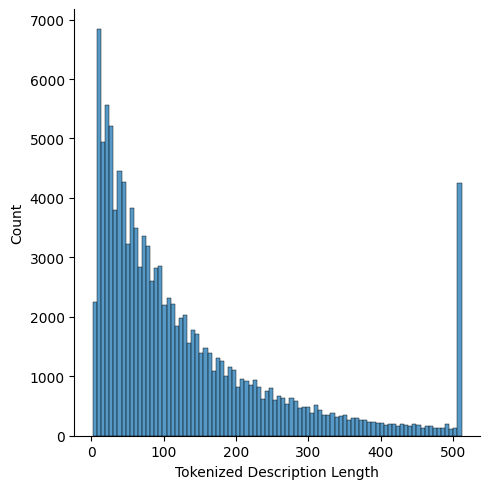

In [8]:
import seaborn as sns
# sns.set(style='white', context='poster', rc={'figure.figsize':(10,10)})
sns.displot(tok_lens, x="Tokenized Description Length")

In [10]:
df['tok_len'] = tok_lens
df.to_csv('Data/meta_with_tok_len.csv', index=True)

In [19]:
temp = df[df['tok_len']<30]
temp

,Symbol,Type,Organism,Description,tok_len
42,CD300H,protein,Homo sapiens,c.61+1A>G) which abolishes the intron 1 donor ...,29
88,EBP1,protein,Candida albicans (strain SC5314 / ATCC MYA-2876),flavin oxidoreductase/NADH oxidase family.,11
97,sprtn,protein,Xenopus laevis,autocatalytic cleavage takes place in trans an...,20
115,PCK1,protein,Sus scrofa,a cytoplasmic one and a mitochondrial one. Bel...,22
123,RBM47,protein,Homo sapiens,Belongs to the RRM RBM47 family.,10
...,...,...,...,...,...
119825,LINC00312,protein,Homo sapiens,Product of a dubious CDS prediction. May be a ...,16
119826,yjgW,protein,Escherichia coli (strain K12),Could be the product of a pseudogene.,9
119827,yubL,protein,H7,Belongs to the UPF0401 family.,9
119828,GUCA1ANB,protein,Homo sapiens,Product of a dubious gene prediction.,8


In [20]:
temp.loc[42, 'Description']

'c.61+1A>G) which abolishes the intron 1 donor splice site leading to loss of CD300H transcripts and protein.'

In [ ]:
temp